In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler, OrdinalEncoder


In [8]:
pip install synapseml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.7/584.7 kB 8.5 MB/s eta 0:00:00


In [16]:
from synapse.ml.core.platform import *
from sklearn.model_selection import train_test_split
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.model_selection import train_test_split
import lightgbm
from sklearn.metrics import roc_auc_score

import matplotlib.pylab as plt

In [2]:
from google.colab import files
uploaded = files.upload()


Saving full_dataset_v3_123.xlsx to full_dataset_v3_123.xlsx


In [57]:
# Sau khi tải lên, bạn có thể đọc file Excel như sau:
import pandas as pd
df = pd.read_excel('full_dataset_v3_123.xlsx')
df.head()

,PhanNhomTuoi,TienCanTuKy,TienSuYKhoa,ChamNoi,CoLap,ChoiCamGiac_VanDong,ChoiKetHop,ChoiGiaVo,HanhViLapLai,KyNangGiaoTiepSom,ChoiLuanPhien,BatChuoc,SaiViec,PhanUngTenGoi,DiNhonChan,ChiTro,ChuYLienKet,TiepXucMat,PhanLoaiBenh,TargetBinary
0,2,0,0,1,1,3,2,0,0,1,1,3,1,3,1,3,2,2,2,1
1,3,1,0,1,1,3,3,0,1,1,0,0,2,0,0,1,1,2,1,1
2,2,0,0,1,0,3,3,2,0,1,0,3,0,1,0,2,1,1,1,1
3,1,0,0,0,0,2,1,1,1,1,0,1,0,1,1,1,2,2,1,1
4,1,0,0,1,0,2,1,1,0,1,0,1,0,1,0,1,2,2,2,1


In [33]:
# Liệt kê tên các cột
print(df.columns.tolist())
rows, cols = df.shape
print(f"Số hàng: {rows}, Số cột: {cols}")

['PhanNhomTuoi', 'TienCanTuKy', 'TienSuYKhoa', 'ChamNoi', 'CoLap', 'ChoiCamGiac_VanDong', 'ChoiKetHop', 'ChoiGiaVo', 'HanhViLapLai', 'KyNangGiaoTiepSom', 'ChoiLuanPhien', 'BatChuoc', 'SaiViec', 'PhanUngTenGoi', 'DiNhonChan', 'ChiTro', 'ChuYLienKet', 'TiepXucMat', 'PhanLoaiBenh', 'TargetBinary']
Số hàng: 593, Số cột: 20


In [58]:
df = df.drop('TargetBinary', axis=1)

In [6]:
for i, col in enumerate(df.columns):
    print(f"Vị trí {i}: {col}")

Vị trí 0: PhanNhomTuoi
Vị trí 1: TienCanTuKy
Vị trí 2: TienSuYKhoa
Vị trí 3: ChamNoi
Vị trí 4: CoLap
Vị trí 5: ChoiCamGiac_VanDong
Vị trí 6: ChoiKetHop
Vị trí 7: ChoiGiaVo
Vị trí 8: HanhViLapLai
Vị trí 9: KyNangGiaoTiepSom
Vị trí 10: ChoiLuanPhien
Vị trí 11: BatChuoc
Vị trí 12: SaiViec
Vị trí 13: PhanUngTenGoi
Vị trí 14: DiNhonChan
Vị trí 15: ChiTro
Vị trí 16: ChuYLienKet
Vị trí 17: TiepXucMat
Vị trí 18: PhanLoaiBenh


In [59]:
X = df.iloc[:, 0:17].values
y = df.iloc[:, 18].values

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

print(f"Kích thước tập train: {len(X_train)} dòng")
print(f"Kích thước tập test: {len(X_test)} dòng")

Kích thước tập train: 474 dòng
Kích thước tập test: 119 dòng


# TRAINING  & EVALUATE MODEL

In [61]:
train_data = lightgbm.Dataset(X_train, label=y_train)
test_data = lightgbm.Dataset(X_test, label=y_test)

In [62]:
print("y_test unique:", np.unique(y_train))
print("y_test unique:", np.unique(y_test))


y_test unique: [1 2 3]
y_test unique: [1 2 3]


In [40]:
pip install -U lightgbm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 30.9 MB/s eta 0:00:00
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 4.5.0
    Uninstalling lightgbm-4.5.0:
      Successfully uninstalled lightgbm-4.5.0


In [41]:
import lightgbm
print(lightgbm.__version__)


4.5.0


In [160]:
import lightgbm as lgb
from sklearn.metrics import classification_report
from lightgbm import LGBMClassifier
from lightgbm import early_stopping, log_evaluation


# 1. Chia tiếp X_train thành train và valid
X_train_final, X_valid, y_train_final, y_valid = train_test_split(
    X_train, y_train, test_size=0.125, random_state=42
)
# Vì 0.125 × 80% = 10% → hợp lý

# 2. Tạo Dataset cho LightGBM
train_data = lgb.Dataset(X_train_final, label=y_train_final)
valid_data = lgb.Dataset(X_valid, label=y_valid, reference=train_data)

# 3. LightGBM yêu cầu nhãn từ 0 → chuyển tạm thời
# y_train_lgb = y_train - 1
# y_test_lgb = y_test - 1

# Truyền tham số cho mô hình
model_lgbm = LGBMClassifier(
    objective='multiclass',
    num_class=3,

    #0.01 là lý tưởng
    learning_rate=0.03,

    #100
    num_leaves=23,

    # càng gần 1 càng tốt
    feature_fraction=0.55,
    bagging_fraction=0.5,

    bagging_freq=5,

    # 500
    n_estimators=100,

    verbose=-1
)

# Không tốt ~ 0.75
# Best params: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100, 'num_leaves': 15}
# Best parameters: {'learning_rate': 0.02753716922955885, 'num_leaves': 23, 'max_depth': 9, 'feature_fraction': 0.5511072855658405, 'bagging_fraction': 0.5116184941325228, 'bagging_freq': 5}

# Training model
model_lgbm.fit(
    X_train_final, y_train_final,
    eval_set=[(X_valid, y_valid)],
    callbacks=[
        early_stopping(stopping_rounds=50),
        log_evaluation(period=100)  # in mỗi 100 vòng
    ]
)

Training until validation scores don't improve for 50 rounds
[100]	valid_0's multi_logloss: 0.523984
Did not meet early stopping. Best iteration is:
[99]	valid_0's multi_logloss: 0.523461


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


LGBMClassifier(bagging_fraction=0.5, bagging_freq=5, feature_fraction=0.55,
               learning_rate=0.03, num_class=3, num_leaves=23,
               objective='multiclass', verbose=-1)

In [161]:
from sklearn.metrics import classification_report, accuracy_score

# Bước 1: Dự đoán
y_pred = model_lgbm.predict(X_test)  # giả sử bạn đang dùng LGBMClassifier

# Bước 2: Cộng lại nhãn để khớp với y_test gốc (1 → 3)
# y_pred_labels = y_pred + 1

# Bước 3: Ánh xạ tên lớp rõ nghĩa
label_map = {
    1: "Nguy cơ",
    2: "Theo dõi",
    3: "Bình thường"
}

class_names = [label_map[1], label_map[2], label_map[3]]

# Bước 4: Hiển thị báo cáo
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=class_names))
print("Accuracy:", accuracy_score(y_test, y_pred))



Classification Report:

              precision    recall  f1-score   support

     Nguy cơ       0.77      0.89      0.83        64
    Theo dõi       0.76      0.57      0.65        44
 Bình thường       0.67      0.73      0.70        11

    accuracy                           0.76       119
   macro avg       0.73      0.73      0.72       119
weighted avg       0.76      0.76      0.75       119

Accuracy: 0.7563025210084033


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


# CẢI TIẾN MÔ HÌNH

## 2. Tối ưu siêu tham số (hyperparameter tuning)

In [148]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier

param_grid = {
    'num_leaves': [15, 31, 63],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 500, 1000],
    'max_depth': [-1, 3, 5]
}

model = LGBMClassifier(
    objective='multiclass',
    num_class=3,
    verbose=-1
)

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',  # hoặc 'f1_macro'
    cv=3,                # k-fold cross-validation
    n_jobs=-1,           # dùng đa luồng
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Best params:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best params: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100, 'num_leaves': 15}
Best score: 0.7194092827004219


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [152]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 17.5 MB/s eta 0:00:00


In [159]:
import optuna
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from lightgbm import early_stopping, log_evaluation

def objective(trial):
    param = {
        'objective': 'multiclass',
        'num_class': 3,
        'metric': 'multi_logloss',
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'learning_rate': trial.suggest_float("learning_rate", 0.01, 0.1),
        'num_leaves': trial.suggest_int("num_leaves", 15, 63),
        'max_depth': trial.suggest_int("max_depth", 3, 10),
        'feature_fraction': trial.suggest_float("feature_fraction", 0.5, 0.9),
        'bagging_fraction': trial.suggest_float("bagging_fraction", 0.5, 0.9),
        'bagging_freq': trial.suggest_int("bagging_freq", 1, 10),
    }

    dtrain = lgb.Dataset(X_train, label=y_train - 1)
    dvalid = lgb.Dataset(X_valid, label=y_valid - 1)



    model = lgb.train(
        param,
        dtrain,
        valid_sets=[dvalid],
        callbacks=[
            early_stopping(30),
            log_evaluation(0)
        ]
    )

    preds = model.predict(X_valid).argmax(axis=1)
    return accuracy_score(y_valid, preds)

# Tối ưu hóa
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

print("Best parameters:", study.best_params)


[I 2025-05-11 08:17:48,875] A new study created in memory with name: no-name-dc33279f-9fd0-4c82-9ef5-c97ce1d6c281


Training until validation scores don't improve for 30 rounds


[I 2025-05-11 08:17:49,625] Trial 0 finished with value: 0.05 and parameters: {'learning_rate': 0.08770758742286322, 'num_leaves': 48, 'max_depth': 6, 'feature_fraction': 0.8524847516047485, 'bagging_fraction': 0.7080167313398994, 'bagging_freq': 1}. Best is trial 0 with value: 0.05.


Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.323628
Training until validation scores don't improve for 30 rounds


[I 2025-05-11 08:17:49,955] Trial 1 finished with value: 0.11666666666666667 and parameters: {'learning_rate': 0.050208302072730276, 'num_leaves': 27, 'max_depth': 10, 'feature_fraction': 0.6961812471522845, 'bagging_fraction': 0.5227195803108842, 'bagging_freq': 1}. Best is trial 1 with value: 0.11666666666666667.


Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.423123
Training until validation scores don't improve for 30 rounds


[I 2025-05-11 08:17:50,511] Trial 2 finished with value: 0.05 and parameters: {'learning_rate': 0.010477494884791844, 'num_leaves': 42, 'max_depth': 10, 'feature_fraction': 0.6206595684310474, 'bagging_fraction': 0.5953735833038734, 'bagging_freq': 9}. Best is trial 1 with value: 0.11666666666666667.


Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.558521
Training until validation scores don't improve for 30 rounds


[I 2025-05-11 08:17:51,481] Trial 3 finished with value: 0.1 and parameters: {'learning_rate': 0.026861308582452913, 'num_leaves': 47, 'max_depth': 4, 'feature_fraction': 0.5572084500990406, 'bagging_fraction': 0.5764890734061784, 'bagging_freq': 3}. Best is trial 1 with value: 0.11666666666666667.
[I 2025-05-11 08:17:51,640] Trial 4 finished with value: 0.11666666666666667 and parameters: {'learning_rate': 0.04908592645617021, 'num_leaves': 19, 'max_depth': 7, 'feature_fraction': 0.5805028803077551, 'bagging_fraction': 0.5992883842096051, 'bagging_freq': 4}. Best is trial 1 with value: 0.11666666666666667.


Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.477582
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[99]	valid_0's multi_logloss: 0.411415
Training until validation scores don't improve for 30 rounds


[I 2025-05-11 08:17:53,324] Trial 5 finished with value: 0.11666666666666667 and parameters: {'learning_rate': 0.0345667689851531, 'num_leaves': 47, 'max_depth': 4, 'feature_fraction': 0.6131800320427205, 'bagging_fraction': 0.5962156244928444, 'bagging_freq': 6}. Best is trial 1 with value: 0.11666666666666667.


Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.450009
Training until validation scores don't improve for 30 rounds


[I 2025-05-11 08:17:53,852] Trial 6 finished with value: 0.05 and parameters: {'learning_rate': 0.07566427377209646, 'num_leaves': 21, 'max_depth': 10, 'feature_fraction': 0.6080894205471606, 'bagging_fraction': 0.8531602674738901, 'bagging_freq': 3}. Best is trial 1 with value: 0.11666666666666667.


Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.321892
Training until validation scores don't improve for 30 rounds


[I 2025-05-11 08:17:54,051] Trial 7 finished with value: 0.1 and parameters: {'learning_rate': 0.04928067241489327, 'num_leaves': 56, 'max_depth': 8, 'feature_fraction': 0.7836544580039824, 'bagging_fraction': 0.6261468537635406, 'bagging_freq': 8}. Best is trial 1 with value: 0.11666666666666667.
[I 2025-05-11 08:17:54,201] Trial 8 finished with value: 0.13333333333333333 and parameters: {'learning_rate': 0.02753716922955885, 'num_leaves': 23, 'max_depth': 9, 'feature_fraction': 0.5511072855658405, 'bagging_fraction': 0.5116184941325228, 'bagging_freq': 5}. Best is trial 8 with value: 0.13333333333333333.


Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.384724
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.483534
Training until validation scores don't improve for 30 rounds


[I 2025-05-11 08:17:54,276] Trial 9 finished with value: 0.08333333333333333 and parameters: {'learning_rate': 0.08899171102933263, 'num_leaves': 41, 'max_depth': 4, 'feature_fraction': 0.5191680826026216, 'bagging_fraction': 0.740464119049214, 'bagging_freq': 3}. Best is trial 8 with value: 0.13333333333333333.
[I 2025-05-11 08:17:54,406] Trial 10 finished with value: 0.016666666666666666 and parameters: {'learning_rate': 0.012328230973151218, 'num_leaves': 31, 'max_depth': 8, 'feature_fraction': 0.7031221660746089, 'bagging_fraction': 0.8202036978026814, 'bagging_freq': 6}. Best is trial 8 with value: 0.13333333333333333.


Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.35314
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.515987
Training until validation scores don't improve for 30 rounds


[I 2025-05-11 08:17:54,501] Trial 11 finished with value: 0.08333333333333333 and parameters: {'learning_rate': 0.0651812603693573, 'num_leaves': 29, 'max_depth': 9, 'feature_fraction': 0.7448264348302178, 'bagging_fraction': 0.5057967380460014, 'bagging_freq': 1}. Best is trial 8 with value: 0.13333333333333333.
[I 2025-05-11 08:17:54,591] Trial 12 finished with value: 0.1 and parameters: {'learning_rate': 0.03370530344559692, 'num_leaves': 29, 'max_depth': 10, 'feature_fraction': 0.6698706089350271, 'bagging_fraction': 0.5075542865471439, 'bagging_freq': 10}. Best is trial 8 with value: 0.13333333333333333.


Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.394483
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.442448
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.413045


[I 2025-05-11 08:17:54,690] Trial 13 finished with value: 0.13333333333333333 and parameters: {'learning_rate': 0.05715539333668226, 'num_leaves': 16, 'max_depth': 6, 'feature_fraction': 0.5013581516274835, 'bagging_fraction': 0.5286051340604898, 'bagging_freq': 7}. Best is trial 8 with value: 0.13333333333333333.
[I 2025-05-11 08:17:54,797] Trial 14 finished with value: 0.06666666666666667 and parameters: {'learning_rate': 0.06517896128972313, 'num_leaves': 15, 'max_depth': 6, 'feature_fraction': 0.5082896406307424, 'bagging_fraction': 0.7610846979408793, 'bagging_freq': 7}. Best is trial 8 with value: 0.13333333333333333.
[I 2025-05-11 08:17:54,899] Trial 15 finished with value: 0.06666666666666667 and parameters: {'learning_rate': 0.022817027333078777, 'num_leaves': 22, 'max_depth': 5, 'feature_fraction': 0.5005889303789233, 'bagging_fraction': 0.6524154767596473, 'bagging_freq': 5}. Best is trial 8 with value: 0.13333333333333333.


Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.369542
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.482116


[I 2025-05-11 08:17:55,000] Trial 16 finished with value: 0.11666666666666667 and parameters: {'learning_rate': 0.039054495957117935, 'num_leaves': 35, 'max_depth': 7, 'feature_fraction': 0.5551438217211014, 'bagging_fraction': 0.550556469772409, 'bagging_freq': 8}. Best is trial 8 with value: 0.13333333333333333.
[I 2025-05-11 08:17:55,082] Trial 17 finished with value: 0.1 and parameters: {'learning_rate': 0.06979001149389429, 'num_leaves': 15, 'max_depth': 3, 'feature_fraction': 0.6605602018021443, 'bagging_fraction': 0.6667632000000185, 'bagging_freq': 5}. Best is trial 8 with value: 0.13333333333333333.


Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[99]	valid_0's multi_logloss: 0.436741
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[96]	valid_0's multi_logloss: 0.409017
Training until validation scores don't improve for 30 rounds


[I 2025-05-11 08:17:55,204] Trial 18 finished with value: 0.03333333333333333 and parameters: {'learning_rate': 0.05721376391917227, 'num_leaves': 62, 'max_depth': 8, 'feature_fraction': 0.8800789056616036, 'bagging_fraction': 0.8996750138326617, 'bagging_freq': 7}. Best is trial 8 with value: 0.13333333333333333.
[I 2025-05-11 08:17:55,297] Trial 19 finished with value: 0.08333333333333333 and parameters: {'learning_rate': 0.09832380658796447, 'num_leaves': 23, 'max_depth': 5, 'feature_fraction': 0.5404468719206786, 'bagging_fraction': 0.5419268195941108, 'bagging_freq': 4}. Best is trial 8 with value: 0.13333333333333333.


Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.306286
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[99]	valid_0's multi_logloss: 0.382308
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.432005


[I 2025-05-11 08:17:55,402] Trial 20 finished with value: 0.1 and parameters: {'learning_rate': 0.041968997838945345, 'num_leaves': 34, 'max_depth': 9, 'feature_fraction': 0.5868676917150905, 'bagging_fraction': 0.5609267423176694, 'bagging_freq': 7}. Best is trial 8 with value: 0.13333333333333333.
[I 2025-05-11 08:17:55,515] Trial 21 finished with value: 0.1 and parameters: {'learning_rate': 0.05417217702868469, 'num_leaves': 26, 'max_depth': 9, 'feature_fraction': 0.8074900058263161, 'bagging_fraction': 0.5265976123506093, 'bagging_freq': 2}. Best is trial 8 with value: 0.13333333333333333.
[I 2025-05-11 08:17:55,617] Trial 22 finished with value: 0.08333333333333333 and parameters: {'learning_rate': 0.020029176544768594, 'num_leaves': 25, 'max_depth': 9, 'feature_fraction': 0.7154220358286395, 'bagging_fraction': 0.5096350146648783, 'bagging_freq': 10}. Best is trial 8 with value: 0.13333333333333333.


Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.398966
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.485473
Training until validation scores don't improve for 30 rounds


[I 2025-05-11 08:17:55,727] Trial 23 finished with value: 0.08333333333333333 and parameters: {'learning_rate': 0.04487094638618247, 'num_leaves': 18, 'max_depth': 7, 'feature_fraction': 0.6433445775015044, 'bagging_fraction': 0.6348817890331255, 'bagging_freq': 2}. Best is trial 8 with value: 0.13333333333333333.
[I 2025-05-11 08:17:55,819] Trial 24 finished with value: 0.11666666666666667 and parameters: {'learning_rate': 0.060035804345109384, 'num_leaves': 26, 'max_depth': 10, 'feature_fraction': 0.754306018193618, 'bagging_fraction': 0.5479639917900627, 'bagging_freq': 8}. Best is trial 8 with value: 0.13333333333333333.


Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.411568
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[96]	valid_0's multi_logloss: 0.397527
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[99]	valid_0's multi_logloss: 0.388993


[I 2025-05-11 08:17:55,923] Trial 25 finished with value: 0.1 and parameters: {'learning_rate': 0.0738088587412111, 'num_leaves': 36, 'max_depth': 6, 'feature_fraction': 0.5408934077955054, 'bagging_fraction': 0.5768474869472561, 'bagging_freq': 4}. Best is trial 8 with value: 0.13333333333333333.
[I 2025-05-11 08:17:56,029] Trial 26 finished with value: 0.08333333333333333 and parameters: {'learning_rate': 0.028706306532297977, 'num_leaves': 18, 'max_depth': 8, 'feature_fraction': 0.574236073281763, 'bagging_fraction': 0.6818889564039892, 'bagging_freq': 6}. Best is trial 8 with value: 0.13333333333333333.
[I 2025-05-11 08:17:56,119] Trial 27 finished with value: 0.08333333333333333 and parameters: {'learning_rate': 0.051425040744511395, 'num_leaves': 31, 'max_depth': 5, 'feature_fraction': 0.6760988065806833, 'bagging_fraction': 0.531267801393769, 'bagging_freq': 9}. Best is trial 8 with value: 0.13333333333333333.


Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.447308
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.416602
Training until validation scores don't improve for 30 rounds


[I 2025-05-11 08:17:56,225] Trial 28 finished with value: 0.08333333333333333 and parameters: {'learning_rate': 0.08066924555458588, 'num_leaves': 15, 'max_depth': 9, 'feature_fraction': 0.5236925731223878, 'bagging_fraction': 0.6223296868819583, 'bagging_freq': 5}. Best is trial 8 with value: 0.13333333333333333.
[I 2025-05-11 08:17:56,325] Trial 29 finished with value: 0.1 and parameters: {'learning_rate': 0.06170881612983506, 'num_leaves': 20, 'max_depth': 6, 'feature_fraction': 0.8243772423162811, 'bagging_fraction': 0.7180597492300601, 'bagging_freq': 1}. Best is trial 8 with value: 0.13333333333333333.


Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.365244
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.353864
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.440715


[I 2025-05-11 08:17:56,427] Trial 30 finished with value: 0.13333333333333333 and parameters: {'learning_rate': 0.036304335525645104, 'num_leaves': 24, 'max_depth': 7, 'feature_fraction': 0.8865210566913321, 'bagging_fraction': 0.501579157223395, 'bagging_freq': 2}. Best is trial 8 with value: 0.13333333333333333.
[I 2025-05-11 08:17:56,546] Trial 31 finished with value: 0.11666666666666667 and parameters: {'learning_rate': 0.03739163372622857, 'num_leaves': 24, 'max_depth': 7, 'feature_fraction': 0.8734207525469282, 'bagging_fraction': 0.5061223747887524, 'bagging_freq': 2}. Best is trial 8 with value: 0.13333333333333333.
[I 2025-05-11 08:17:56,646] Trial 32 finished with value: 0.1 and parameters: {'learning_rate': 0.046055542871528896, 'num_leaves': 28, 'max_depth': 10, 'feature_fraction': 0.8504032004454501, 'bagging_fraction': 0.5708635635506939, 'bagging_freq': 1}. Best is trial 8 with value: 0.13333333333333333.


Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.436327
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.404352
Training until validation scores don't improve for 30 rounds


[I 2025-05-11 08:17:56,745] Trial 33 finished with value: 0.1 and parameters: {'learning_rate': 0.019009048655653997, 'num_leaves': 22, 'max_depth': 8, 'feature_fraction': 0.750197658191079, 'bagging_fraction': 0.5301807584255391, 'bagging_freq': 2}. Best is trial 8 with value: 0.13333333333333333.
[I 2025-05-11 08:17:56,841] Trial 34 finished with value: 0.11666666666666667 and parameters: {'learning_rate': 0.03121253153067277, 'num_leaves': 19, 'max_depth': 6, 'feature_fraction': 0.8973535979883295, 'bagging_fraction': 0.5960237242653943, 'bagging_freq': 3}. Best is trial 8 with value: 0.13333333333333333.


Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.493422
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.437076
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.47529


[I 2025-05-11 08:17:56,943] Trial 35 finished with value: 0.13333333333333333 and parameters: {'learning_rate': 0.02486554212565013, 'num_leaves': 38, 'max_depth': 9, 'feature_fraction': 0.6338634890141236, 'bagging_fraction': 0.5739622467552932, 'bagging_freq': 1}. Best is trial 8 with value: 0.13333333333333333.
[I 2025-05-11 08:17:57,041] Trial 36 finished with value: 0.06666666666666667 and parameters: {'learning_rate': 0.014399487356969283, 'num_leaves': 51, 'max_depth': 7, 'feature_fraction': 0.6407393875639924, 'bagging_fraction': 0.5720592198422585, 'bagging_freq': 1}. Best is trial 8 with value: 0.13333333333333333.
[I 2025-05-11 08:17:57,137] Trial 37 finished with value: 0.11666666666666667 and parameters: {'learning_rate': 0.0254415371962771, 'num_leaves': 39, 'max_depth': 5, 'feature_fraction': 0.5708320844684861, 'bagging_fraction': 0.5294710339398551, 'bagging_freq': 4}. Best is trial 8 with value: 0.13333333333333333.


Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.531335
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.482081
Training until validation scores don't improve for 30 rounds


[I 2025-05-11 08:17:57,244] Trial 38 finished with value: 0.08333333333333333 and parameters: {'learning_rate': 0.016815301551896682, 'num_leaves': 44, 'max_depth': 8, 'feature_fraction': 0.6056357077481636, 'bagging_fraction': 0.5565646448393863, 'bagging_freq': 2}. Best is trial 8 with value: 0.13333333333333333.
[I 2025-05-11 08:17:57,350] Trial 39 finished with value: 0.08333333333333333 and parameters: {'learning_rate': 0.02591696305732715, 'num_leaves': 52, 'max_depth': 9, 'feature_fraction': 0.6317906704398899, 'bagging_fraction': 0.6096745098444469, 'bagging_freq': 3}. Best is trial 8 with value: 0.13333333333333333.


Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.516145
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.460426
Training until validation scores don't improve for 30 rounds


[I 2025-05-11 08:17:57,463] Trial 40 finished with value: 0.11666666666666667 and parameters: {'learning_rate': 0.03685373589044571, 'num_leaves': 39, 'max_depth': 6, 'feature_fraction': 0.5909131698855141, 'bagging_fraction': 0.5847047783466659, 'bagging_freq': 6}. Best is trial 8 with value: 0.13333333333333333.
[I 2025-05-11 08:17:57,588] Trial 41 finished with value: 0.1 and parameters: {'learning_rate': 0.041858448843318886, 'num_leaves': 33, 'max_depth': 10, 'feature_fraction': 0.5379490498853411, 'bagging_fraction': 0.5181461415466608, 'bagging_freq': 1}. Best is trial 8 with value: 0.13333333333333333.


Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.444167
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.44328
Training until validation scores don't improve for 30 rounds


[I 2025-05-11 08:17:57,693] Trial 42 finished with value: 0.1 and parameters: {'learning_rate': 0.05101017251651758, 'num_leaves': 17, 'max_depth': 10, 'feature_fraction': 0.7213722476157932, 'bagging_fraction': 0.5011146614021593, 'bagging_freq': 1}. Best is trial 8 with value: 0.13333333333333333.
[I 2025-05-11 08:17:57,793] Trial 43 finished with value: 0.13333333333333333 and parameters: {'learning_rate': 0.03163533760883098, 'num_leaves': 27, 'max_depth': 9, 'feature_fraction': 0.6945820735633808, 'bagging_fraction': 0.5448241223825124, 'bagging_freq': 2}. Best is trial 8 with value: 0.13333333333333333.


Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.424098
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.452295
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.448817


[I 2025-05-11 08:17:57,893] Trial 44 finished with value: 0.11666666666666667 and parameters: {'learning_rate': 0.031207775502547837, 'num_leaves': 31, 'max_depth': 9, 'feature_fraction': 0.6836627198720671, 'bagging_fraction': 0.542711097524872, 'bagging_freq': 3}. Best is trial 8 with value: 0.13333333333333333.
[I 2025-05-11 08:17:57,991] Trial 45 finished with value: 0.03333333333333333 and parameters: {'learning_rate': 0.01037177065738865, 'num_leaves': 24, 'max_depth': 8, 'feature_fraction': 0.7743738578900767, 'bagging_fraction': 0.5608155454842715, 'bagging_freq': 2}. Best is trial 8 with value: 0.13333333333333333.
[I 2025-05-11 08:17:58,094] Trial 46 finished with value: 0.11666666666666667 and parameters: {'learning_rate': 0.023145429339881285, 'num_leaves': 21, 'max_depth': 9, 'feature_fraction': 0.7053186290970448, 'bagging_fraction': 0.6073018365661484, 'bagging_freq': 7}. Best is trial 8 with value: 0.13333333333333333.


Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.559782
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.46707


[I 2025-05-11 08:17:58,194] Trial 47 finished with value: 0.1 and parameters: {'learning_rate': 0.031469806835944705, 'num_leaves': 43, 'max_depth': 8, 'feature_fraction': 0.6548732153390129, 'bagging_fraction': 0.520803115718075, 'bagging_freq': 4}. Best is trial 8 with value: 0.13333333333333333.
[I 2025-05-11 08:17:58,293] Trial 48 finished with value: 0.06666666666666667 and parameters: {'learning_rate': 0.021098733615320598, 'num_leaves': 37, 'max_depth': 7, 'feature_fraction': 0.5600049422064064, 'bagging_fraction': 0.5414330284631809, 'bagging_freq': 9}. Best is trial 8 with value: 0.13333333333333333.


Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.454352
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.493649


[I 2025-05-11 08:17:58,425] Trial 49 finished with value: 0.08333333333333333 and parameters: {'learning_rate': 0.03509088956551199, 'num_leaves': 27, 'max_depth': 9, 'feature_fraction': 0.5163058688710783, 'bagging_fraction': 0.7698686186496276, 'bagging_freq': 5}. Best is trial 8 with value: 0.13333333333333333.


Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.42002
Best parameters: {'learning_rate': 0.02753716922955885, 'num_leaves': 23, 'max_depth': 9, 'feature_fraction': 0.5511072855658405, 'bagging_fraction': 0.5116184941325228, 'bagging_freq': 5}


## 1. SMOTE CẢI TIẾN CÂN BẰNG DỮ LIỆU

SMOTE (Synthetic Minority Over-sampling Technique) là một kỹ thuật tăng cường dữ liệu (data augmentation) cho các lớp thiểu số (minority class) trong các bài toán mất cân bằng lớp.

In [162]:
pip install imbalanced-learn

In [163]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from lightgbm import LGBMClassifier, early_stopping, log_evaluation

# 1. Áp dụng SMOTE để cân bằng dữ liệu train
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 2. Chia tiếp từ dữ liệu đã cân bằng để tạo train và validation
X_train_final, X_valid, y_train_final, y_valid = train_test_split(
    X_train_resampled, y_train_resampled, test_size=0.125, random_state=42
)

# 3. Khởi tạo mô hình với tham số đã tối ưu (từ Optuna hoặc tuning thủ công)
model_lgbm = LGBMClassifier(
    objective='multiclass',
    num_class=3,
    learning_rate=0.03,
    num_leaves=23,
    feature_fraction=0.55,
    bagging_fraction=0.5,
    bagging_freq=5,
    n_estimators=100,
    verbose=-1
)

# 4. Huấn luyện mô hình
model_lgbm.fit(
    X_train_final, y_train_final,
    eval_set=[(X_valid, y_valid)],
    callbacks=[
        early_stopping(stopping_rounds=50),
        log_evaluation(period=100)
    ]
)

# 5. Dự đoán và đánh giá trên tập test
y_pred = model_lgbm.predict(X_test)

# 6. Ánh xạ nhãn
label_map = {
    1: "Nguy cơ",
    2: "Theo dõi",
    3: "Bình thường"
}
y_test_named = pd.Series(y_test).map(label_map)
y_pred_named = pd.Series(y_pred).map(label_map)

print("\nClassification Report:")
print(classification_report(
    y_test_named,
    y_pred_named,
    labels=["Nguy cơ", "Theo dõi", "Bình thường"],
    target_names=["Nguy cơ", "Theo dõi", "Bình thường"]
))


Training until validation scores don't improve for 50 rounds
[100]	valid_0's multi_logloss: 0.423055
Did not meet early stopping. Best iteration is:
[99]	valid_0's multi_logloss: 0.422399

Classification Report:
              precision    recall  f1-score   support

     Nguy cơ       0.80      0.80      0.80        64
    Theo dõi       0.69      0.66      0.67        44
 Bình thường       0.69      0.82      0.75        11

    accuracy                           0.75       119
   macro avg       0.73      0.76      0.74       119
weighted avg       0.75      0.75      0.75       119



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


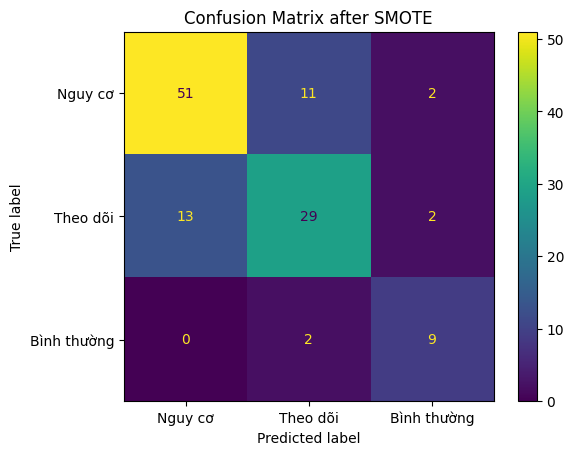

In [164]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=class_names)
plt.title("Confusion Matrix after SMOTE")
plt.show()


# KẾT LUẬN

Đánh giá: Cân bằng khá tốt giữa các lớp, đặc biệt là lớp ít như "Bình thường"

Lỗi chủ yếu xảy ra giữa “Nguy cơ” ↔ “Theo dõi”

Mô hình ít khi nhầm "Bình thường" thành "Nguy cơ" → Tốt về mặt an toàn cảnh báo

Đề xuất:
Hay nhầm giữa "Nguy cơ" và "Theo dõi"	 --> Thêm đặc trưng phân biệt tốt hơn, hoặc dùng mô hình kết hợp (ensemble)
"Bình thường" ít dữ liệu --> Có thể thêm kỹ thuật target encoding hoặc data augmentation mềm (sinh thêm mẫu từ Bình thường)